<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/02-Q2-HParamsFinal/A2_Q2_FashionMNISTHandwritten_Hparams_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers

# Data Preprocessing

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4423680/4422102 [==============================] - 0s 0us/step


# HandWritten Model

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=15, 
                    validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4226 - accuracy: 0.8483 - val_loss: 0.3023 - val_accuracy: 0.8941
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2766 - accuracy: 0.8978 - val_loss: 0.2679 - val_accuracy: 0.9020
Epoch 3/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2331 - accuracy: 0.9145 - val_loss: 0.2517 - val_accuracy: 0.9090
Epoch 4/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2035 - accuracy: 0.9255 - val_loss: 0.2470 - val_accuracy: 0.9105
Epoch 5/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1793 - accuracy: 0.9330 - val_loss: 0.2303 - val_accuracy: 0.9200
Epoch 6/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1587 - accuracy: 0.9402 - val_loss: 0.2494 - val_accuracy: 0.9141
Epoch 7/15
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1402 - accuracy: 0.9472 - val_loss: 0.2340 - val_accuracy:

313/313 - 1s - loss: 0.3238 - accuracy: 0.9271


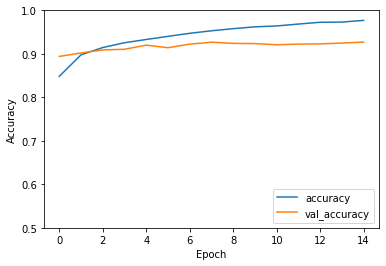

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

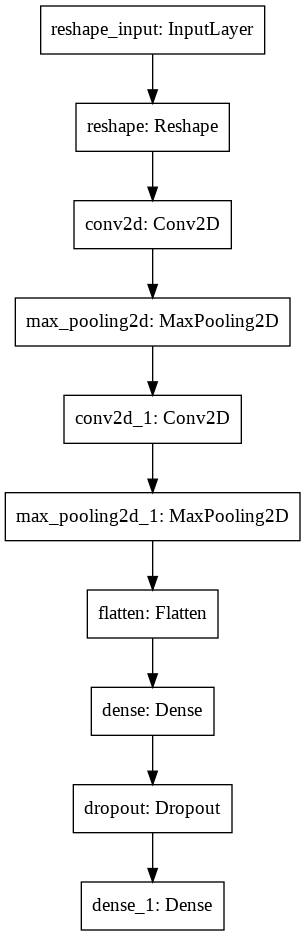

In [ ]:
keras.utils.plot_model(model)

# Loading AutoKeras Model

In [ ]:
from keras.models import load_model
# returns a compiled model
# identical to the previous one
model = load_model('/content/drive/My Drive/Colab Notebooks/AutoKerasFashionMNIST.h5')
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
random_translation (RandomTrans (None, 28, 28, 1)    0           normalization[0][0]              
__________________________________________________________________________________________________
random_flip (RandomFlip)        (None, 28, 28, 1)    0           random_translation[0][0]         
_______________________________________________________________________________________

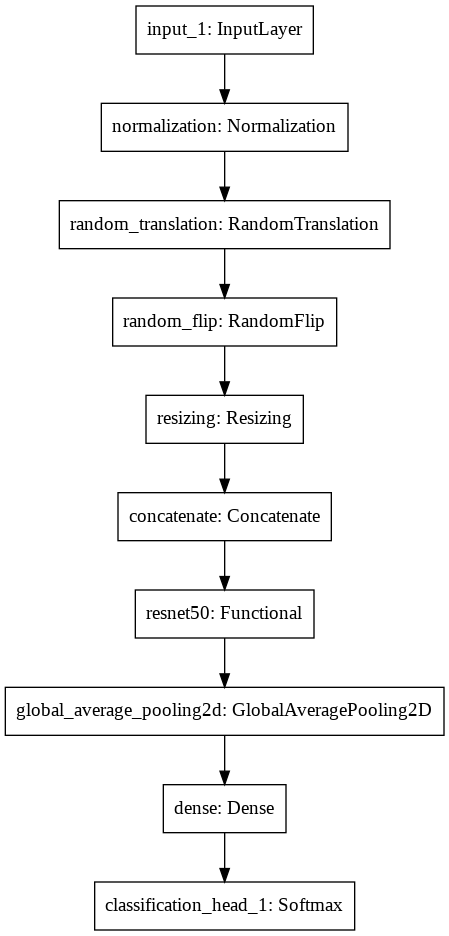

In [ ]:
keras.utils.plot_model(model)

# HParams Tuning

In [5]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [6]:
from tensorboard.plugins.hparams import api as hp

In [7]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

# Optimizer Tuning

In [ ]:
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['rmsprop','sgd','adam', 'nadam','adadelta','adagrad','adamax','ftrl']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_OPTIMIZER],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [ ]:
session_num = 0
algodict = {}
for optimizer in HP_OPTIMIZER.domain.values:
    hparams = {
        HP_OPTIMIZER: optimizer,
    }
    run_name = "run-%d" % session_num
    print('--- Starting trial: %s' % run_name)
    print({h.name: hparams[h] for h in hparams})
    algodict[optimizer] = run('logs/hparam_opt_tuning/' + run_name, hparams)
    session_num += 1


--- Starting trial: run-0
{'optimizer': 'adadelta'}
Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1896 - accuracy: 0.2725
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9125 - accuracy: 0.4915
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5769 - accuracy: 0.5528
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3030 - accuracy: 0.5834
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1367 - accuracy: 0.6085
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0330 - accuracy: 0.6344
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9633 - accuracy: 0.6567
Epoch 8/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9148 - accuracy: 0.6760
Epoch 9/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8724 - accuracy: 0.6916
Epoch 10/15
1875/1875 [=======

In [ ]:
algodict

{'adadelta': 0.7753000259399414,
 'adagrad': 0.8468999862670898,
 'adam': 0.9247000217437744,
 'adamax': 0.9221000075340271,
 'ftrl': 0.10000000149011612,
 'nadam': 0.9200999736785889,
 'rmsprop': 0.8895999789237976,
 'sgd': 0.8974000215530396}

In [ ]:
print(sorted(algodict.items(),key=lambda x: (x[1],x[0])))
plotvar = sorted(algodict.items(),key=lambda x: (x[1],x[0]))

[('ftrl', 0.10000000149011612), ('adadelta', 0.7753000259399414), ('adagrad', 0.8468999862670898), ('rmsprop', 0.8895999789237976), ('sgd', 0.8974000215530396), ('nadam', 0.9200999736785889), ('adamax', 0.9221000075340271), ('adam', 0.9247000217437744)]


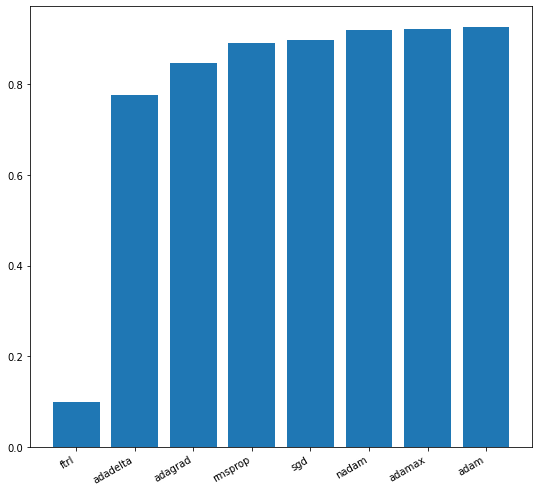

In [ ]:
plt.bar([x[0] for x in plotvar],[x[1] for x in plotvar])
f = plt.gcf()
f.set_size_inches(9,9)
f.autofmt_xdate()

In [ ]:
plt.savefig('/content/optimizer-clean-compare.png')

<Figure size 432x288 with 0 Axes>

# Activation function Tuning

### 1 - layer Minimal Network - 3 Combinations

In [ ]:
HP_ACTIVATION = hp.HParam('activation1', hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATION],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    # model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    # model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATION]))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [ ]:
session_num = 0
acttemp = {}
for act in HP_ACTIVATION.domain.values:
    hparams = {
        HP_ACTIVATION: act,
    }
    run_name = "run-%d" % session_num
    print('--- Starting trial: %s' % run_name)
    print({h.name: hparams[h] for h in hparams})
    acttemp[act] = run('logs/hparam_opt_tuning/' + run_name, hparams)
    session_num += 1


--- Starting trial: run-0
{'activation1': 'elu'}
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3861 - accuracy: 0.8631
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2892 - accuracy: 0.8962
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2561 - accuracy: 0.9077
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2359 - accuracy: 0.9134
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2154 - accuracy: 0.9210
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2013 - accuracy: 0.9263
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1896 - accuracy: 0.9302
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1811 - accuracy: 0.9330
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1711 - accuracy: 0.9366
Epoch 10/15
1875/1875 [==========

In [ ]:
acttemp

{'elu': 0.902999997138977,
 'relu': 0.9211999773979187,
 'selu': 0.8988999724388123}

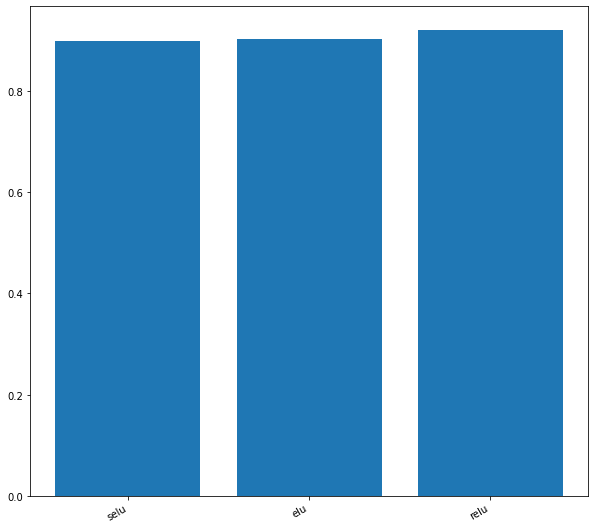

In [ ]:
plotvartemp = sorted(acttemp.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvartemp],[x[1] for x in plotvartemp])
f = plt.gcf()
f.set_size_inches(10,10)
f.autofmt_xdate()

## 2 - layer Handwritten Network - 9 Combos

In [ ]:
HP_ACTIVATIONA = hp.HParam('activation1', hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONB = hp.HParam('activation2', hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATIONA,HP_ACTIVATIONB],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONA], input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    # model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
    # model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONB]))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [ ]:
session_num = 0
act2 = {}
for actA in HP_ACTIVATIONA.domain.values:
    for actB in HP_ACTIVATIONB.domain.values:
        hparams = {
            HP_ACTIVATIONA: actA,
            HP_ACTIVATIONB: actB
        }
        run_name = "run-%d" % session_num
        print('--- Starting trial: %s' % run_name)
        print({h.name: hparams[h] for h in hparams})
        act2[(actA,actB)] = run('logs/hparam_opt_tuning/' + run_name, hparams)
        session_num += 1


--- Starting trial: run-0
{'activation1': 'elu', 'activation2': 'elu'}
Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4190 - accuracy: 0.8525
Epoch 2/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3245 - accuracy: 0.8844
Epoch 3/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2961 - accuracy: 0.8927
Epoch 4/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2723 - accuracy: 0.9022
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2580 - accuracy: 0.9064
Epoch 6/15
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2454 - accuracy: 0.9114
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2278 - accuracy: 0.9171
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2166 - accuracy: 0.9214
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2064 - accuracy: 0.9253
Epoch 10/15

In [ ]:
act2

{('elu', 'elu'): 0.9110000133514404,
 ('elu', 'relu'): 0.9176999926567078,
 ('elu', 'selu'): 0.8866999745368958,
 ('relu', 'elu'): 0.8992999792098999,
 ('relu', 'relu'): 0.9204000234603882,
 ('relu', 'selu'): 0.8913000226020813,
 ('selu', 'elu'): 0.9121000170707703,
 ('selu', 'relu'): 0.916700005531311,
 ('selu', 'selu'): 0.8996999859809875}

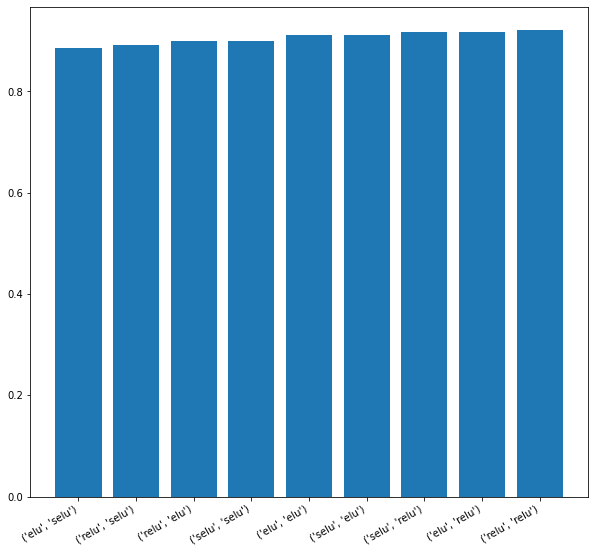

In [ ]:
plotvar2 = sorted(act2.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar2],[x[1] for x in plotvar2])
f = plt.gcf()
f.set_size_inches(10,10)
f.autofmt_xdate()

## 3 - layer Handwritten Network - 27 Combinations

In [8]:
HP_ACTIVATIONC = hp.HParam('activationC', hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIOND = hp.HParam('activationD', hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONE = hp.HParam('activationE', hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATIONC,HP_ACTIVATIOND,HP_ACTIVATIONE],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [9]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONC], input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIOND]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONE]))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [10]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [11]:
session_num = 0
act2p = {}
for actC in HP_ACTIVATIONC.domain.values:
    for actD in HP_ACTIVATIOND.domain.values:
        for actE in HP_ACTIVATIONE.domain.values:
            hparams = {
                HP_ACTIVATIONC: actC,
                HP_ACTIVATIOND: actD,
                HP_ACTIVATIONE: actE
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            act2p[(actC,actD,actE)] = run('logs/hparam_opt_tuning/' + run_name, hparams)
            session_num += 1


--- Starting trial: run-0
{'activationC': 'elu', 'activationD': 'elu', 'activationE': 'elu'}
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4028 - accuracy: 0.8566
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2936 - accuracy: 0.8957
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2593 - accuracy: 0.9067
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2365 - accuracy: 0.9140
Epoch 5/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2158 - accuracy: 0.9220
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2005 - accuracy: 0.9277
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1856 - accuracy: 0.9321
Epoch 8/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1751 - accuracy: 0.9355
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1614 - accura

In [13]:
act2p

{('elu', 'elu', 'elu'): 0.9090999960899353,
 ('elu', 'elu', 'relu'): 0.9179999828338623,
 ('elu', 'elu', 'selu'): 0.896399974822998,
 ('elu', 'relu', 'elu'): 0.9075999855995178,
 ('elu', 'relu', 'relu'): 0.9200999736785889,
 ('elu', 'relu', 'selu'): 0.8960999846458435,
 ('elu', 'selu', 'elu'): 0.907800018787384,
 ('elu', 'selu', 'relu'): 0.9192000031471252,
 ('elu', 'selu', 'selu'): 0.8974999785423279,
 ('relu', 'elu', 'elu'): 0.911300003528595,
 ('relu', 'elu', 'relu'): 0.9241999983787537,
 ('relu', 'elu', 'selu'): 0.904699981212616,
 ('relu', 'relu', 'elu'): 0.9092000126838684,
 ('relu', 'relu', 'relu'): 0.9186000227928162,
 ('relu', 'relu', 'selu'): 0.9053000211715698,
 ('relu', 'selu', 'elu'): 0.9114000201225281,
 ('relu', 'selu', 'relu'): 0.9223999977111816,
 ('relu', 'selu', 'selu'): 0.902999997138977,
 ('selu', 'elu', 'elu'): 0.9150999784469604,
 ('selu', 'elu', 'relu'): 0.9192000031471252,
 ('selu', 'elu', 'selu'): 0.8980000019073486,
 ('selu', 'relu', 'elu'): 0.906300008296966

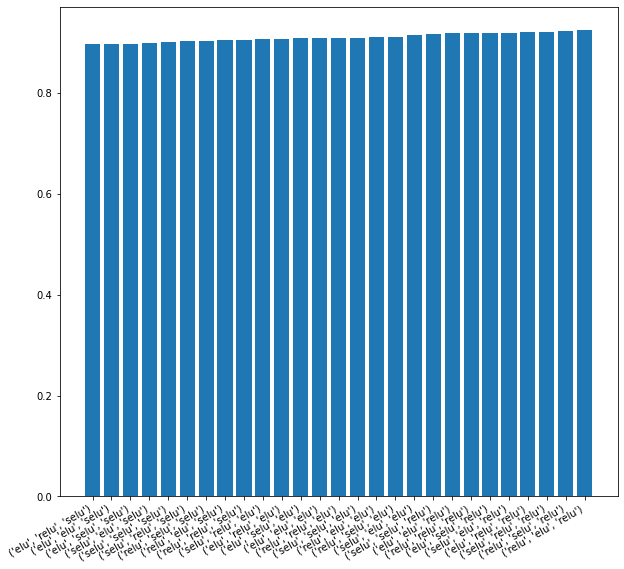

In [14]:
plotvarA = sorted(act2p.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvarA],[x[1] for x in plotvarA])
f = plt.gcf()
f.set_size_inches(10,10)
f.autofmt_xdate()

### 4 - Layer - Modified Network - 81 Combinations 

In [ ]:
# HP_NUM_UNITS = hp.HParam('num_units', hp.Discrete([16, 32]))
# HP_DROPOUT = hp.HParam('dropout', hp.RealInterval(0.1, 0.2))
HP_ACTIVATIONS1 = hp.HParam('activation1',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS2 = hp.HParam('activation2',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS3 = hp.HParam('activation3',hp.Discrete(['relu','selu','elu']))
HP_ACTIVATIONS4 = hp.HParam('activation4',hp.Discrete(['relu','selu','elu']))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning_acts').as_default():
  hp.hparams_config(
    hparams=[HP_ACTIVATIONS1,HP_ACTIVATIONS2,HP_ACTIVATIONS3,HP_ACTIVATIONS4],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [ ]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS1], input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation=hparams[HP_ACTIVATIONS2]))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS3]))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(512, activation=hparams[HP_ACTIVATIONS4]))
    #model.add(layers.BatchNormalization(center=True, scale=False))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [ ]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [ ]:
session_num = 0
actdict_4layer = {}
for act1 in HP_ACTIVATIONS1.domain.values:
    for act2 in HP_ACTIVATIONS2.domain.values:
        for act3 in HP_ACTIVATIONS3.domain.values:
            for act4 in HP_ACTIVATIONS4.domain.values:            
                hparams = {
                    HP_ACTIVATIONS1: act1,
                    HP_ACTIVATIONS2: act2,
                    HP_ACTIVATIONS3: act3,
                    HP_ACTIVATIONS4: act4
                }
                run_name = "run-%d" % session_num
                print('--- Starting trial: %s' % run_name)
                print({h.name: hparams[h] for h in hparams})
                actdict_4layer[(act1,act2,act3,act4)] = run('logs/hparam_tuning_acts/' + run_name, hparams)
                session_num += 1


--- Starting trial: run-0
{'activation1': 'elu', 'activation2': 'elu', 'activation3': 'elu', 'activation4': 'elu'}
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3448 - accuracy: 0.1344
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3028 - accuracy: 0.1042
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1049
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1028
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3030 - accuracy: 0.1044
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.1029
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 12.9098 - accuracy: 0.1004
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 9.9241 - accuracy: 0.1002
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step 

In [ ]:
 print(f"Number of Sessions: {session_num}")

Number of Sessions: 81


In [ ]:
actdict_4layer

{('elu', 'elu', 'elu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'elu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'elu', 'selu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'relu', 'selu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'elu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'relu'): 0.10000000149011612,
 ('elu', 'elu', 'selu', 'selu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'elu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'elu', 'selu'): 0.014000000432133675,
 ('elu', 'relu', 'relu', 'elu'): 0.09369999915361404,
 ('elu', 'relu', 'relu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'relu', 'selu'): 0.10000000149011612,
 ('elu', 'relu', 'selu', 'elu'): 0.1444000005722046,
 ('elu', 'relu', 'selu', 'relu'): 0.10000000149011612,
 ('elu', 'relu', 'selu', 'selu'): 0.10000000149011612,
 ('elu', 'selu', 'elu', 'elu'):

In [ ]:
print(sorted(actdict_4layer.items(),key=lambda x: (x[1],x[0])))

[(('elu', 'relu', 'elu', 'selu'), 0.014000000432133675), (('selu', 'selu', 'selu', 'relu'), 0.06620000302791595), (('selu', 'selu', 'relu', 'selu'), 0.093299999833107), (('elu', 'relu', 'relu', 'elu'), 0.09369999915361404), (('relu', 'elu', 'elu', 'selu'), 0.09380000084638596), (('selu', 'elu', 'elu', 'selu'), 0.09870000183582306), (('elu', 'elu', 'elu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'elu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'elu', 'selu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'relu', 'selu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'elu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'relu'), 0.10000000149011612), (('elu', 'elu', 'selu', 'selu'), 0.10000000149011612), (('elu', 'relu', 'elu', 'elu'), 0.10000000149011612), (('elu', 'relu', 'elu', 'relu'), 0.10000000149011612), (('elu', 'relu', 'relu', 'relu'), 0.10000000149011612), (('elu', 're

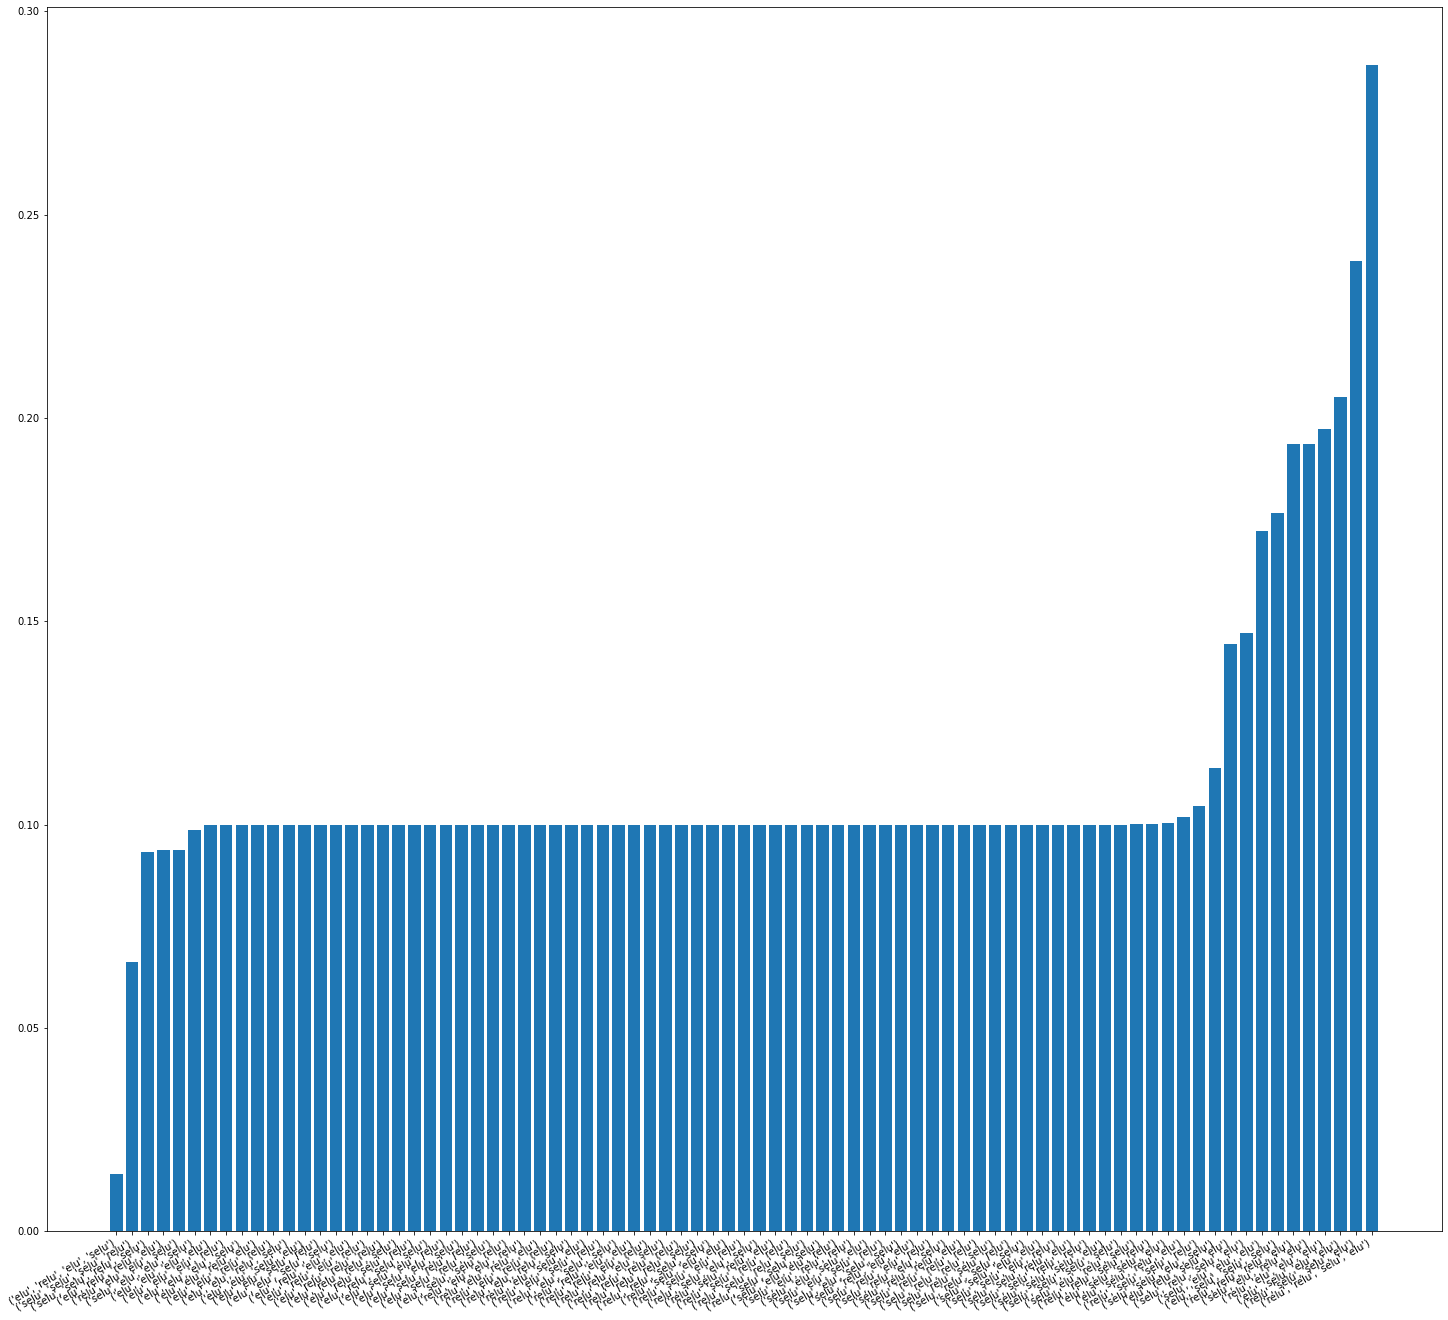

In [ ]:
plotvar2 = sorted(actdict_4layer.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvar2],[x[1] for x in plotvar2])
f = plt.gcf()
f.set_size_inches(25,25)
f.autofmt_xdate()

# Number of Units Training

In [15]:
HP_FILTER1 = hp.HParam('filter1', hp.Discrete([32,64,128]))
HP_FILTER2 = hp.HParam('filter2', hp.Discrete([32,64,128]))
HP_NUM_UNITS1 = hp.HParam('num_units1', hp.Discrete([256,512,1024]))

METRIC_ACCURACY = 'accuracy'

with tf.summary.create_file_writer('logs/hparam_tuning').as_default():
  hp.hparams_config(
    hparams=[HP_FILTER1,HP_FILTER2,HP_NUM_UNITS1],
    metrics=[hp.Metric(METRIC_ACCURACY, display_name='Accuracy')],
  )

In [16]:
def train_test_model(hparams):
  #model = load_model('/content/drive/My Drive/Colab Notebooks/CS581-TestResults/AutoKerasFashionMNIST.h5')
    model = models.Sequential()
    model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
    model.add(layers.Conv2D(hparams[HP_FILTER1], kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Conv2D(hparams[HP_FILTER2], kernel_size=(3,3), padding='same', activation='elu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(hparams[HP_NUM_UNITS1], activation='relu'))
    model.add(layers.Dropout(0.50))
    model.add(layers.Dense(10))

    model.compile(
        optimizer='adam',
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=['accuracy'],
    )
    model.fit(x_train, y_train, epochs=15) # Run with 1 epoch to speed things up for demo purposes
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [17]:
def run(run_dir, hparams):
  with tf.summary.create_file_writer(run_dir).as_default():
    hp.hparams(hparams)  # record the values used in this trial
    accuracy = train_test_model(hparams)
    tf.summary.scalar(METRIC_ACCURACY, accuracy, step=1)
  return accuracy

In [18]:
session_num = 0
act2pop = {}
for filter1 in HP_FILTER1.domain.values:
    for filter2 in HP_FILTER2.domain.values:
        for units1 in HP_NUM_UNITS1.domain.values:
            hparams = {
                HP_FILTER1: filter1,
                HP_FILTER2: filter2,
                HP_NUM_UNITS1: units1
            }
            run_name = "run-%d" % session_num
            print('--- Starting trial: %s' % run_name)
            print({h.name: hparams[h] for h in hparams})
            act2pop[(filter1,filter2,units1)] = run('logs/hparam_opt_tuning/' + run_name, hparams)
            session_num += 1


--- Starting trial: run-0
{'filter1': 32, 'filter2': 32, 'num_units1': 256}
Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4445 - accuracy: 0.8389
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2923 - accuracy: 0.8928
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2550 - accuracy: 0.9056
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2310 - accuracy: 0.9151
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2109 - accuracy: 0.9207
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1923 - accuracy: 0.9283
Epoch 7/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1800 - accuracy: 0.9337
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1654 - accuracy: 0.9378
Epoch 9/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1536 - accuracy: 0.9427
Epoch 

In [19]:
print(f'Number of Sessions: {session_num}')

Number of Sessions: 27


In [20]:
act2pop

{(32, 32, 256): 0.9228000044822693,
 (32, 32, 512): 0.9221000075340271,
 (32, 32, 1024): 0.9160000085830688,
 (32, 64, 256): 0.9180999994277954,
 (32, 64, 512): 0.9217000007629395,
 (32, 64, 1024): 0.9243000149726868,
 (32, 128, 256): 0.9164999723434448,
 (32, 128, 512): 0.9180999994277954,
 (32, 128, 1024): 0.9197999835014343,
 (64, 32, 256): 0.9247000217437744,
 (64, 32, 512): 0.9235000014305115,
 (64, 32, 1024): 0.9222000241279602,
 (64, 64, 256): 0.920199990272522,
 (64, 64, 512): 0.921999990940094,
 (64, 64, 1024): 0.9200000166893005,
 (64, 128, 256): 0.9190999865531921,
 (64, 128, 512): 0.9228000044822693,
 (64, 128, 1024): 0.9248999953269958,
 (128, 32, 256): 0.9210000038146973,
 (128, 32, 512): 0.9179999828338623,
 (128, 32, 1024): 0.92330002784729,
 (128, 64, 256): 0.9244999885559082,
 (128, 64, 512): 0.9211999773979187,
 (128, 64, 1024): 0.921500027179718,
 (128, 128, 256): 0.9254999756813049,
 (128, 128, 512): 0.9236999750137329,
 (128, 128, 1024): 0.9194999933242798}

In [21]:
print(sorted(act2pop.items(),key=lambda x: (x[1],x[0])))

[((32, 32, 1024), 0.9160000085830688), ((32, 128, 256), 0.9164999723434448), ((128, 32, 512), 0.9179999828338623), ((32, 64, 256), 0.9180999994277954), ((32, 128, 512), 0.9180999994277954), ((64, 128, 256), 0.9190999865531921), ((128, 128, 1024), 0.9194999933242798), ((32, 128, 1024), 0.9197999835014343), ((64, 64, 1024), 0.9200000166893005), ((64, 64, 256), 0.920199990272522), ((128, 32, 256), 0.9210000038146973), ((128, 64, 512), 0.9211999773979187), ((128, 64, 1024), 0.921500027179718), ((32, 64, 512), 0.9217000007629395), ((64, 64, 512), 0.921999990940094), ((32, 32, 512), 0.9221000075340271), ((64, 32, 1024), 0.9222000241279602), ((32, 32, 256), 0.9228000044822693), ((64, 128, 512), 0.9228000044822693), ((128, 32, 1024), 0.92330002784729), ((64, 32, 512), 0.9235000014305115), ((128, 128, 512), 0.9236999750137329), ((32, 64, 1024), 0.9243000149726868), ((128, 64, 256), 0.9244999885559082), ((64, 32, 256), 0.9247000217437744), ((64, 128, 1024), 0.9248999953269958), ((128, 128, 256),

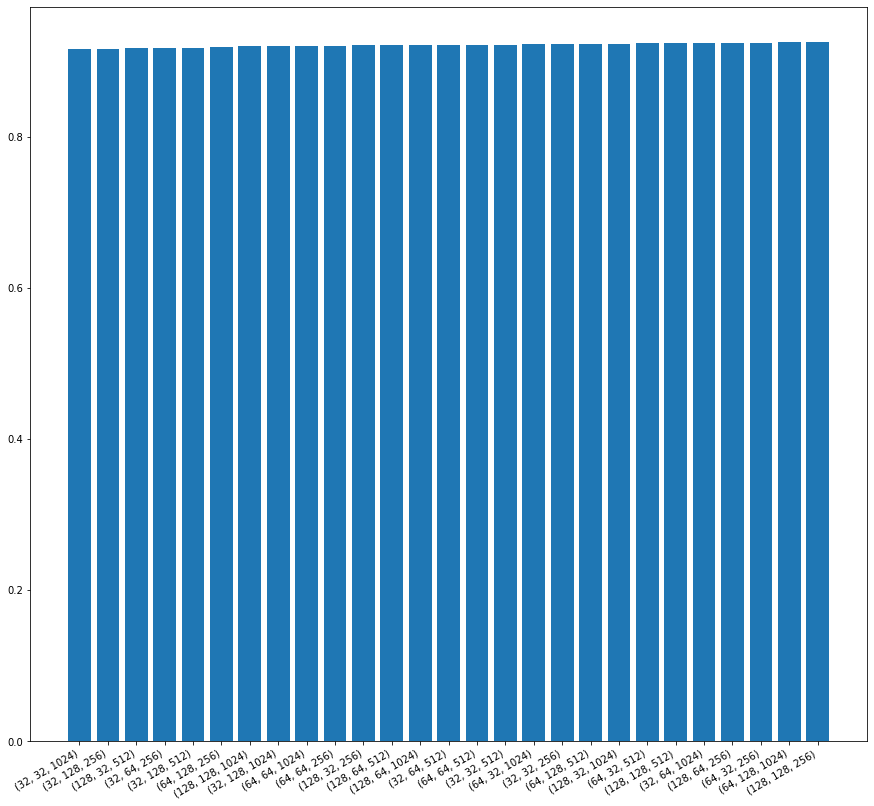

In [23]:
plotvarB = sorted(act2pop.items(),key=lambda x: (x[1],x[0]))
plt.bar([str(x[0]) for x in plotvarB],[x[1] for x in plotvarB])
f = plt.gcf()
f.set_size_inches(15,15)
f.autofmt_xdate()

# END